In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
train_data -= mean
# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_data /= std
# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean
test_data /= std

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
# 출력층 (회귀 문제이므로 활성화 함수 없이 출력)
model.add(layers.Dense(1))
# 모델 컴파일 (손실 함수는 mse, 성능 지표는 mae)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(
    train_data, 
    train_labels, 
    epochs=100,  # 에포크 수 (학습 횟수)
    batch_size=32,  # 배치 크기 (한 번에 학습할 샘플 수)
    validation_split=0.2,  # 훈련 데이터의 20%를 검증 데이터로 사용
    verbose=1  # 학습 과정을 출력
)

Epoch 1/100
11/11 [==============================] - 1s 16ms/step - loss: 568.4348 - mean_absolute_error: 21.9768 - val_loss: 613.4640 - val_mean_absolute_error: 22.9837
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 527.5405 - mean_absolute_error: 20.9627 - val_loss: 565.9540 - val_mean_absolute_error: 21.9006
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 479.6071 - mean_absolute_error: 19.7379 - val_loss: 508.7867 - val_mean_absolute_error: 20.5240
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 422.1549 - mean_absolute_error: 18.1548 - val_loss: 434.3608 - val_mean_absolute_error: 18.6912
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 347.1730 - mean_absolute_error: 16.1489 - val_loss: 343.6178 - val_mean_absolute_error: 16.2740
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 261.8794 - mean_absolute_error: 13.7082 - val_loss: 240.9010 - val_mean_absolute_

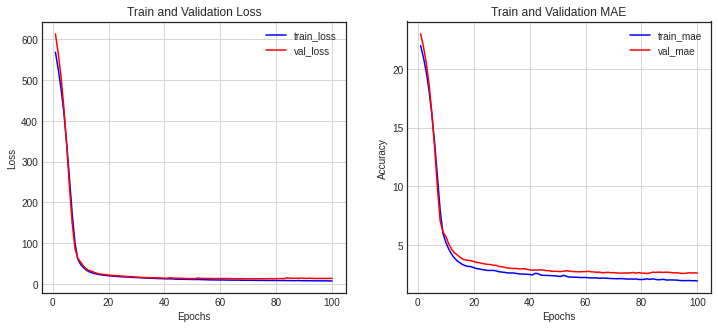

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mean_absolute_error']
val_mae = history_dict['val_mean_absolute_error']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_mae = model.evaluate(test_data, test_labels)

# 평가 결과 출력
print(f'Test Loss (MSE): {test_loss}')
print(f'Test MAE: {test_mae}')

4/4 [==============================] - 0s 2ms/step - loss: 23.8736 - mean_absolute_error: 2.9743
Test Loss (MSE): 23.873632431030273
Test MAE: 2.9743430614471436


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [9]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [10]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, sequence in enumerate(data):
    results[i, sequence] = 1
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_val = to_categorical(val_labels)
y_test = to_categorical(test_labels)

In [11]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(512, input_shape=(10000,)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(124,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(68,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
# 출력 레이어 (10개의 클래스에 대해 Softmax 활성화)
model.add(layers.Dense(46, activation='softmax'))  # Reuters 데이터셋에는 46개의 클래스

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               5120512   
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 124)               63612     
_________________________________________________________________
batch_normalization_1 (Batch (None, 124)               496       
_________________________________________________________________
dropout_1 (Dropout)          (None, 124)              

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# ModelCheckpoint 콜백 함수: 모델의 가중치가 개선될 때마다 저장
checkpoint = ModelCheckpoint('best_model.h5', 
                             monitor='val_loss', 
                             save_best_only=True, 
                             verbose=1)
# EarlyStopping 콜백 함수: 검증 손실이 개선되지 않으면 학습을 중단
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=3,  # 검증 손실이 3 에포크 동안 개선되지 않으면 학습 중지
                               restore_best_weights=True,  # 중지 후 최상의 가중치 복원
                               verbose=1)

history = model.fit(x_train, y_train, epochs=100, batch_size=512,
                    validation_data=(x_val, y_val), verbose=2,
                    callbacks=[checkpoint, early_stopping])

Epoch 1/100
14/14 - 1s - loss: 3.6688 - accuracy: 0.2050 - val_loss: 3.5434 - val_accuracy: 0.5530

Epoch 00001: val_loss improved from inf to 3.54339, saving model to best_model.h5
Epoch 2/100
14/14 - 0s - loss: 2.3740 - accuracy: 0.5059 - val_loss: 3.0978 - val_accuracy: 0.6616

Epoch 00002: val_loss improved from 3.54339 to 3.09782, saving model to best_model.h5
Epoch 3/100
14/14 - 0s - loss: 1.8047 - accuracy: 0.6277 - val_loss: 2.6690 - val_accuracy: 0.7110

Epoch 00003: val_loss improved from 3.09782 to 2.66903, saving model to best_model.h5
Epoch 4/100
14/14 - 0s - loss: 1.4821 - accuracy: 0.6893 - val_loss: 2.3202 - val_accuracy: 0.7217

Epoch 00004: val_loss improved from 2.66903 to 2.32022, saving model to best_model.h5
Epoch 5/100
14/14 - 0s - loss: 1.2941 - accuracy: 0.7282 - val_loss: 2.0739 - val_accuracy: 0.7204

Epoch 00005: val_loss improved from 2.32022 to 2.07392, saving model to best_model.h5
Epoch 6/100
14/14 - 0s - loss: 1.1376 - accuracy: 0.7573 - val_loss: 1.914

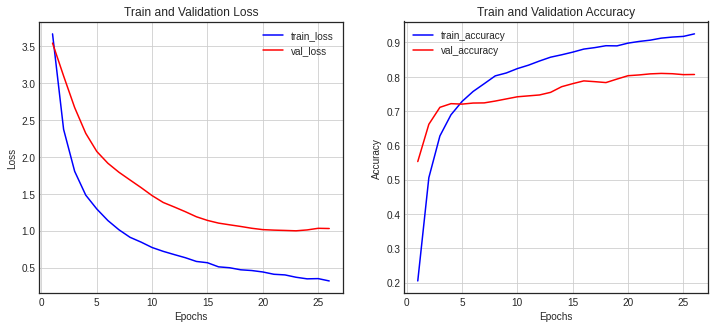

In [14]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [15]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
best_model = models.load_model('best_model.h5')
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

71/71 [==============================] - 0s 2ms/step - loss: 1.0873 - accuracy: 0.7845
Test Loss: 1.0872713327407837
Test Accuracy: 0.7845057845115662


In [34]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [94]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [95]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(x_train.shape[0], 32 * 32 * 3)
x_val = x_val.reshape(x_val.shape[0], 32 * 32 * 3)
x_test = x_test.reshape(x_test.shape[0], 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [96]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [102]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.initializers import lecun_normal
model = models.Sequential()

model.add(layers.Flatten(input_shape=(32, 32, 3)))

# First dense layer with Leaky ReLU, L2 regularization, and LeCun initialization
model.add(layers.Dense(512, kernel_initializer=lecun_normal(),  # LeCun initialization
                       kernel_regularizer=regularizers.l2(0.001)))  # L2 regularization
model.add(LeakyReLU(alpha=0.2))  # Leaky ReLU with a negative slope of 0.2
model.add(layers.BatchNormalization())  # Normalize the activations
model.add(layers.Dropout(0.3))  # Dropout for regularization

# Second dense layer with Leaky ReLU, L2 regularization, and LeCun initialization
model.add(layers.Dense(256, kernel_initializer=lecun_normal(),  # LeCun initialization
                       kernel_regularizer=regularizers.l2(0.001)))  # L2 regularization
model.add(LeakyReLU(alpha=0.2))  # Leaky ReLU with a negative slope of 0.2
model.add(layers.BatchNormalization())  # Normalize the activations
model.add(layers.Dropout(0.4))  # Dropout for regularization

# Third dense layer with Leaky ReLU, L2 regularization, and LeCun initialization
model.add(layers.Dense(128, kernel_initializer=lecun_normal(),  # LeCun initialization
                       kernel_regularizer=regularizers.l2(0.001)))  # L2 regularization
model.add(LeakyReLU(alpha=0.2))  # Leaky ReLU with a negative slope of 0.2
model.add(layers.BatchNormalization())  # Normalize the activations
model.add(layers.Dropout(0.5))  # Dropout for regularization

# Output layer for classification (10 classes)
model.add(layers.Dense(10, activation='softmax'))

from tensorflow.keras.optimizers import Adam

# 고정 학습률 사용
optimizer = Adam(learning_rate=0.00005)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 512)               1573376   
_________________________________________________________________
leaky_re_lu_40 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
batch_normalization_42 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_42 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_41 (LeakyReLU)   (None, 256)             

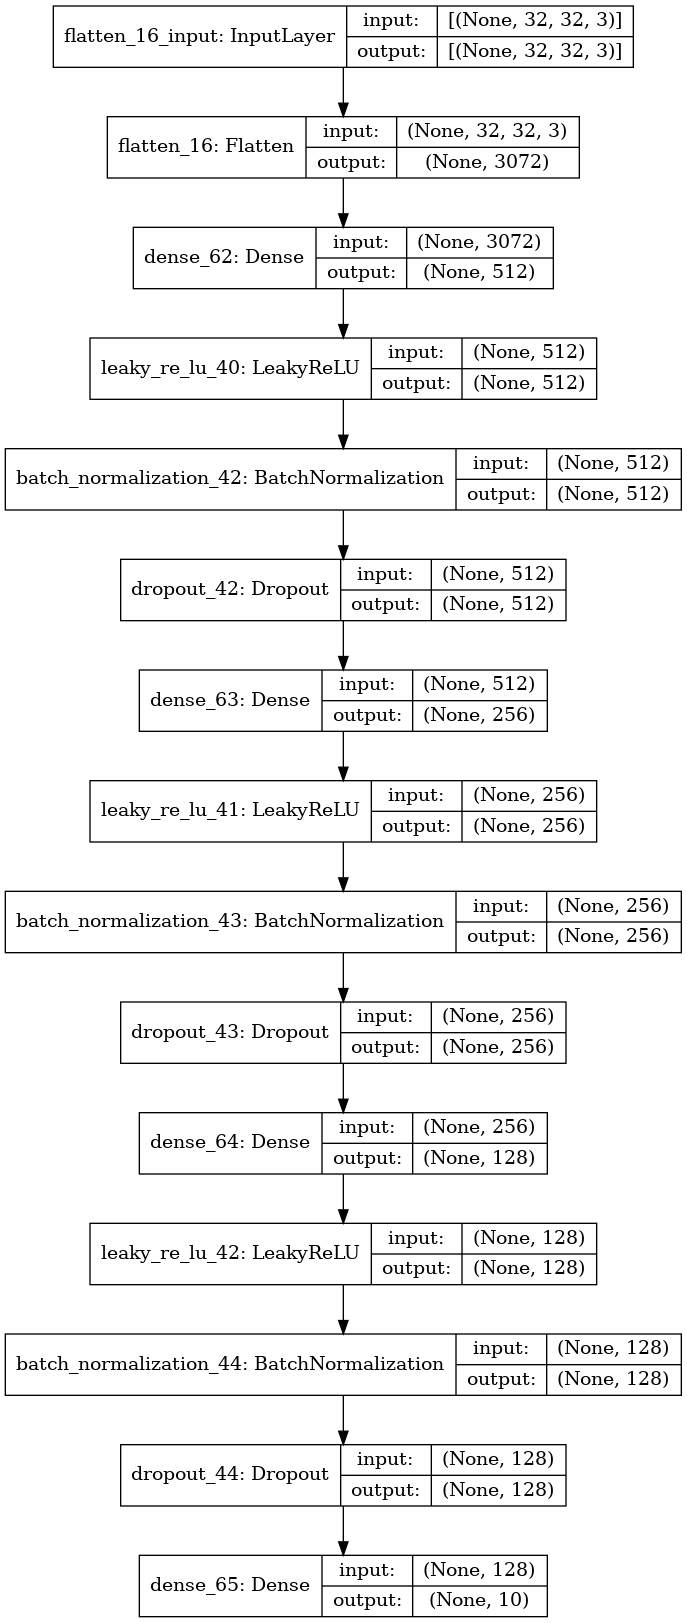

In [104]:
utils.plot_model(model, show_shapes=True)

In [105]:
# ModelCheckpoint 콜백 함수 설정: 최상의 검증 성능(val_loss)을 기준으로 모델 저장
checkpoint = ModelCheckpoint(
    'best_cifar10_model.h5',  # 모델 저장 경로
    monitor='val_loss',       # 모니터링할 지표
    save_best_only=True,      # 최상의 모델만 저장
    verbose=1                 # 진행 상태 출력
)

# EarlyStopping 콜백 함수 설정: 검증 성능(val_loss)이 개선되지 않으면 학습 조기 종료
early_stopping = EarlyStopping(
    monitor='val_loss',       # 모니터링할 지표
    patience=5,               # 성능 개선이 없으면 5 에포크 후 학습 중단
    restore_best_weights=True,  # 최상의 가중치를 복원
    verbose=1                 # 진행 상태 출력
)

history = model.fit(
    x_train, y_train,
    epochs=100,                # 최대 에포크 수
    batch_size=256,           # 배치 크기
    validation_data=(x_val, y_val),  # 검증 데이터
    callbacks=[checkpoint, early_stopping],  # 콜백 함수 목록
    verbose=2                 # 학습 로그 출력 수준
)

Epoch 1/100
157/157 - 2s - loss: 3.6918 - accuracy: 0.2150 - val_loss: 2.9068 - val_accuracy: 0.2903

Epoch 00001: val_loss improved from inf to 2.90675, saving model to best_cifar10_model.h5
Epoch 2/100
157/157 - 1s - loss: 3.3740 - accuracy: 0.2646 - val_loss: 2.7312 - val_accuracy: 0.3473

Epoch 00002: val_loss improved from 2.90675 to 2.73116, saving model to best_cifar10_model.h5
Epoch 3/100
157/157 - 1s - loss: 3.2502 - accuracy: 0.2811 - val_loss: 2.6289 - val_accuracy: 0.3896

Epoch 00003: val_loss improved from 2.73116 to 2.62892, saving model to best_cifar10_model.h5
Epoch 4/100
157/157 - 1s - loss: 3.1402 - accuracy: 0.2996 - val_loss: 2.5970 - val_accuracy: 0.3952

Epoch 00004: val_loss improved from 2.62892 to 2.59704, saving model to best_cifar10_model.h5
Epoch 5/100
157/157 - 1s - loss: 3.0784 - accuracy: 0.3081 - val_loss: 2.5588 - val_accuracy: 0.4051

Epoch 00005: val_loss improved from 2.59704 to 2.55881, saving model to best_cifar10_model.h5
Epoch 6/100
157/157 - 1s

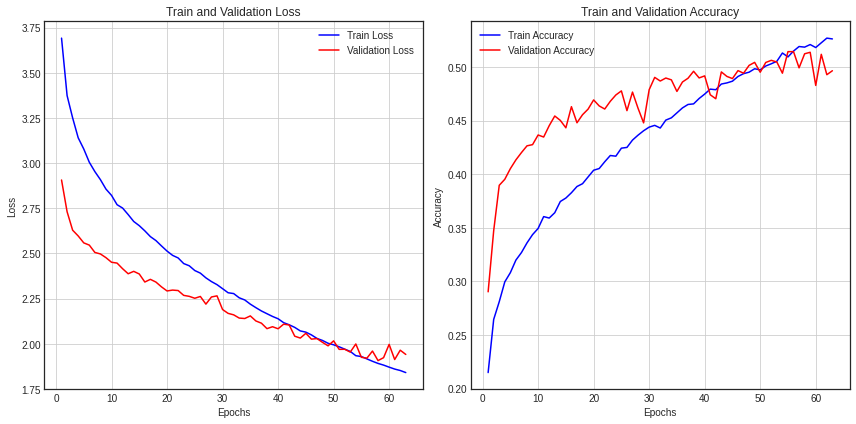

In [106]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
history_dict = history.history

# Loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Accuracy
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 1번째 서브플롯: Loss 시각화
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b-', label='Train Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 2번째 서브플롯: Accuracy 시각화
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'b-', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.tight_layout()
plt.show()

In [107]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.9004 - accuracy: 0.5134


[1.9004151821136475, 0.5134000182151794]